# Week 11&12 - Project Milestone5 (Koppula Veera Reddy)

# loading Milestone2 CSV data

In [1]:
#Load the necessary libraries
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt

In [2]:
#Create a script that will read dictionary file line by line to create header list.
text_file = []
with open('Covid_CDC_Headers.txt','r') as f:
    for line in f:
        f.readline()
        var=line.split(":")[0]
        text_file.append(var)

Replace Header & Format data into a more readable format, with fixing errors

In [3]:
#Header Replace with row0 dropped & previous errors in load are cleaned
df = pd.read_csv("COVID-19_CDC_data.csv",names=text_file, error_bad_lines=False, index_col=False, dtype='unicode')
df.drop(0, inplace=True)
df.head()

,CaseMonth,State,StateCode,County,CountyCode,AgeGroup,Sex,Race,Ethinicity,CasePositiveInterval,CaseOnsetInterval,IdentificationProcess,Exposure,CurrentStatus,SymptomsShown,Hospitalized,ICUAdmittance,Death,UnderlyingConditions
1,2020-11,IN,18,POSEY,18129,0 - 17 years,NaN,NaN,NaN,0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
2,2021-03,KY,21,WOODFORD,21239,0 - 17 years,NaN,NaN,NaN,NaN,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
3,2020-08,MI,26,ANTRIM,26009,18 to 49 years,NaN,NaN,NaN,NaN,0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
4,2021-07,WA,53,ASOTIN,53003,18 to 49 years,NaN,NaN,NaN,0,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Missing,Yes
5,2020-07,WI,55,IOWA,55049,18 to 49 years,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,Unknown,NaN


Identify outliers and bad data On additional Columns

In [4]:
#Summary of the data with null values in each column
df.isnull().sum()

CaseMonth                       4
State                         678
StateCode                     678
County                    1875515
CountyCode                1875515
AgeGroup                   377973
Sex                       1020368
Race                      5846875
Ethinicity                6806875
CasePositiveInterval     23006281
CaseOnsetInterval        17671972
IdentificationProcess           0
Exposure                        0
CurrentStatus                   0
SymptomsShown                   0
Hospitalized                    0
ICUAdmittance                   0
Death                     1595858
UnderlyingConditions     30795980
dtype: int64

In [5]:
size_orig = df.shape

In [6]:
df_orig = df
#Stripping none values in visit column and saving back to current data set
df.dropna(inplace=True)
#calculating size of the data after clean-up
size_cleaned = df.shape

In [7]:
print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".
      format(prev=size_orig, after=size_cleaned))

The size of previous data was - 32806678 rows and the size of the new one is - 789393 rows


In [8]:
df.head()

,CaseMonth,State,StateCode,County,CountyCode,AgeGroup,Sex,Race,Ethinicity,CasePositiveInterval,CaseOnsetInterval,IdentificationProcess,Exposure,CurrentStatus,SymptomsShown,Hospitalized,ICUAdmittance,Death,UnderlyingConditions
45,2021-01,WA,53,BENTON,53005,0 - 17 years,Female,Missing,Hispanic/Latino,0,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,No,Missing,Yes
54,2020-04,KS,20,FORD,20057,18 to 49 years,Male,Unknown,Hispanic/Latino,1,0,Clinical evaluation,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,Yes
147,2021-01,NC,37,MONTGOMERY,37123,18 to 49 years,Male,White,Hispanic/Latino,0,0,Missing,Unknown,Laboratory-confirmed case,Symptomatic,No,Unknown,No,Yes
201,2020-05,NC,37,SAMPSON,37163,0 - 17 years,Female,White,Hispanic/Latino,1,0,Missing,Unknown,Laboratory-confirmed case,Symptomatic,No,Unknown,No,Yes
251,2020-11,WA,53,SPOKANE,53063,0 - 17 years,Female,Missing,Hispanic/Latino,0,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,Missing,Yes


Fix casing or inconsistent values

In [9]:
df = df[(df.Race != 'Unknown') & (df.Race != 'Missing')]
df.isnull().sum()

CaseMonth                0
State                    0
StateCode                0
County                   0
CountyCode               0
AgeGroup                 0
Sex                      0
Race                     0
Ethinicity               0
CasePositiveInterval     0
CaseOnsetInterval        0
IdentificationProcess    0
Exposure                 0
CurrentStatus            0
SymptomsShown            0
Hospitalized             0
ICUAdmittance            0
Death                    0
UnderlyingConditions     0
dtype: int64

In [10]:
size_cleaned = df.shape
print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".
      format(prev=size_orig, after=size_cleaned))

The size of previous data was - 32806678 rows and the size of the new one is - 731068 rows


cleaning Missing and Unknown values in Sex, Ethinicity

Identify outliers and bad data

In [11]:
df = df[(df.Sex != 'Unknown') & (df.Sex != 'Missing')]
df = df[(df.Ethinicity != 'Unknown') & (df.Ethinicity != 'Missing')]

In [12]:
size_cleaned = df.shape
print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".
      format(prev=size_orig, after=size_cleaned))

The size of previous data was - 32806678 rows and the size of the new one is - 683822 rows


In [13]:
CDCCovidData = df


In [14]:
CDCCovidData.shape

(683822, 19)

**Creating SQL connection and loading table data into SQL**

In [15]:
from sqlalchemy import create_engine #Creating alchemy engine

In [16]:
engine = create_engine('sqlite:///dsc540Project.db', echo=True)
sqlite_connection = engine.connect()

In [17]:
sqlite_table = "CDCCovidData" #defining sqllite table and loading data
CDCCovidData.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2021-11-19 23:04:13,126 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("CDCCovidData")
2021-11-19 23:04:13,127 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 23:04:13,128 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("CDCCovidData")
2021-11-19 23:04:13,128 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 23:04:13,131 INFO sqlalchemy.engine.Engine 
CREATE TABLE "CDCCovidData" (
	"index" BIGINT, 
	"CaseMonth" TEXT, 
	"State" TEXT, 
	"StateCode" TEXT, 
	"County" TEXT, 
	"CountyCode" TEXT, 
	"AgeGroup" TEXT, 
	"Sex" TEXT, 
	"Race" TEXT, 
	"Ethinicity" TEXT, 
	"CasePositiveInterval" TEXT, 
	"CaseOnsetInterval" TEXT, 
	"IdentificationProcess" TEXT, 
	"Exposure" TEXT, 
	"CurrentStatus" TEXT, 
	"SymptomsShown" TEXT, 
	"Hospitalized" TEXT, 
	"ICUAdmittance" TEXT, 
	"Death" TEXT, 
	"UnderlyingConditions" TEXT
)


2021-11-19 23:04:13,132 INFO sqlalchemy.engine.Engine [no key 0.00095s] ()
2021-11-19 23:04:13,134 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 23:04:13,134 

In [18]:
sqlite_connection.close()#connection close

In [19]:
#connecting to DB to validate that the data got loaded
import sqlite3 
conn = sqlite3.connect("dsc540Project.db")
c = conn.cursor()
for ppl, age in c.execute("SELECT count(*), State FROM CDCCovidData GROUP BY State"):
    print("We have {} records from state {}".format(ppl, age))

We have 367 records from state AK
We have 3 records from state AL
We have 98693 records from state AR
We have 1 records from state AZ
We have 4 records from state CA
We have 339 records from state CO
We have 1 records from state CT
We have 14 records from state FL
We have 2 records from state GA
We have 12841 records from state IA
We have 10835 records from state ID
We have 1 records from state IL
We have 58 records from state IN
We have 24405 records from state KS
We have 1772 records from state KY
We have 413 records from state LA
We have 6 records from state MA
We have 3 records from state MD
We have 70225 records from state MN
We have 3 records from state MS
We have 66353 records from state NC
We have 8 records from state NH
We have 1 records from state NJ
We have 58843 records from state NV
We have 102253 records from state NY
We have 63941 records from state OH
We have 36188 records from state PA
We have 2 records from state SC
We have 2 records from state SD
We have 41651 record

# Loading milestone 3 Web Scraped data into SQL

In [20]:
#Load the necessary libraries
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from bs4 import BeautifulSoup
import requests

In [21]:
    url='https://www.worldometers.info/coronavirus/country/us/'
#Create a handle, page, to handle the contents of the website
page = requests.get(url)
page

<Response [200]>

In [22]:
#Rendering html vis BS
soup = BeautifulSoup(page.text, 'html.parser')

In [23]:
#Stripping all tables
all_tables = soup.find_all("table")
#Stripping specific table needed and validating that the type is a tag
data_table = soup.find("table", {"id": "usa_table_countries_today"})
print(type(data_table))

<class 'bs4.element.Tag'>


In [24]:
data_header = data_table.thead.findAll('tr', recursive=False)[0].findAll('th', recursive=False)
#Extracting headers for columns
data_headers = [th.get_text().strip() for th in data_header]

In [25]:
#Extracting all rows
data_rows = data_table.tbody.findAll('tr')[1:]
#Cleaning rows to get the data
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in data_rows]
#load of data and headers into a data frame
df1 = pd.DataFrame(data_rows1, columns=data_headers,dtype='unicode')

In [26]:
#Replacing headers
df1.rename(columns={"#": "ID", "USAState": "StateName","Tests/\n1M pop":"TestsPer1Mill","Tot\xa0Cases/1M pop":"TotalCasesPerMill","Deaths/1M pop":"DeathsPerMill"}, inplace=True)
#dropping columns with values that are not readable and enhancing view to fit in single pane
df_state_data=df1.drop(columns=['Source', 'Projections'])
#Replacing empty cells with NaN and then replcing by 0 for readability
df_state_data = df_state_data.replace(r'^\s*$', np.NaN, regex=True)
df_state_data.fillna(0, inplace=True)
# Replaing non reported data N/A to Null so that it will be easier to merge in Milestone5
df_state_data = df_state_data.replace('N/A', np.NaN, regex=True)
df_state_data.fillna(0, inplace=True)
worldometerData=df_state_data

In [27]:
#US State name to 2 letter code Dictionary
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
    "District Of Columbia":"DC",
}
    


In [28]:
#Replacing Statenames to 2 letter codes for merge
worldometerData = worldometerData.replace({"StateName": us_state_to_abbrev})

In [29]:
worldometerData.shape

(51, 13)

In [30]:
#changing object types to Int
worldometerData['TotalCases'] = worldometerData['TotalCases'].str.replace(',', '').astype(int)
worldometerData['TotalDeaths']= worldometerData['TotalDeaths'].str.replace(',', '').astype(int)
worldometerData['TotalRecovered']=worldometerData['TotalRecovered'].str.replace(',', '').astype(int,errors='ignore')
worldometerData['ActiveCases']=worldometerData['ActiveCases'].str.replace(',', '').astype(int,errors='ignore')
worldometerData['TotalCasesPerMill']=worldometerData['TotalCasesPerMill'].str.replace(',', '').astype(int)
worldometerData['DeathsPerMill']=worldometerData['DeathsPerMill'].str.replace(',', '').astype(int)
worldometerData['TotalTests']=worldometerData['TotalTests'].str.replace(',', '').astype(int)
worldometerData['TestsPer1Mill']=worldometerData['TestsPer1Mill'].str.replace(',', '').astype(int)
worldometerData['Population']=worldometerData['Population'].str.replace(',', '').astype(int)

In [31]:
#inplace Null replacement by 0
worldometerData.fillna(0, inplace=True)

**Creating SQL connection and loading table data into SQL**

In [32]:
engine = create_engine('sqlite:///dsc540Project.db', echo=True)
sqlite_connection = engine.connect()

In [33]:
sqlite_table = "worldometerData" #defining sqllite table and loading data
worldometerData.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2021-11-19 23:04:23,461 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("worldometerData")
2021-11-19 23:04:23,462 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 23:04:23,463 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("worldometerData")
2021-11-19 23:04:23,464 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 23:04:23,465 INFO sqlalchemy.engine.Engine 
CREATE TABLE "worldometerData" (
	"index" BIGINT, 
	"ID" TEXT, 
	"StateName" TEXT, 
	"TotalCases" BIGINT, 
	"NewCases" FLOAT, 
	"TotalDeaths" BIGINT, 
	"NewDeaths" FLOAT, 
	"TotalRecovered" TEXT, 
	"ActiveCases" TEXT, 
	"TotalCasesPerMill" BIGINT, 
	"DeathsPerMill" BIGINT, 
	"TotalTests" BIGINT, 
	"TestsPer1Mill" BIGINT, 
	"Population" BIGINT
)


2021-11-19 23:04:23,466 INFO sqlalchemy.engine.Engine [no key 0.00051s] ()
2021-11-19 23:04:23,467 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 23:04:23,468 INFO sqlalchemy.engine.Engine CREATE INDEX "ix_worldometerData_index" ON "worldometerData" ("index")
2021-11-1

In [34]:
sqlite_connection.close()#connection close

In [35]:
#connecting to DB to validate that the data got loaded
import sqlite3 
conn = sqlite3.connect("dsc540Project.db")
c = conn.cursor()
for count in c.execute("SELECT count(*) FROM worldometerData"):
    print("We have {} state data in worldometerData table".format(count))

We have (51,) state data in worldometerData table


# Loading milestone 4 API Scraped data into SQL

added additional comments to describe on data load process from API

In [36]:
#Importing needed libraries
import urllib.request, urllib.parse, urllib.error
import json
import requests
import ssl
import re
import pandas as pd
import io
import numpy as np

In [37]:
#Resetting SSL context to avoid errors in accessing https certs
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

**I have created an API key from the COVID data API website and have loaded into APIkeys file with key name as COVIDapi**



In [38]:
#Retrieving API Key for calling the COVID API
with open('APIkeys.json') as f:
    keys = json.load(f)
    covidapi = keys['COVIDapi']

In [39]:
#Forming URL parameters
keyurl = 'https://api.covidactnow.org/v2/states.csv?'
apikey = 'apiKey='+covidapi

In [40]:
#Calling the URL to retrieve CSV data and saving it into a Pandas Data frame
url = keyurl +apikey
print('Retrieving the data from... ')
print(url) # validating the URL
uh = urllib.request.urlopen(url) # performing URL call to open with URL + API Key
data = uh.read() # data retrieved in CSV format is loaded into data variable
rawData = pd.read_csv(io.StringIO(data.decode('utf-8'))) # formatting data read from API In CSV format and loading into a data frame

Retrieving the data from... 
https://api.covidactnow.org/v2/states.csv?apiKey=3d4d39a3bf274ed9bfef33842b6da7ed


In [41]:
#Validating size of dataframe
rawData.shape

(53, 52)

In [42]:
#Renaming the columns and loading into a new data frame
workingData=rawData.rename(columns={"actuals.cases": "TotalCases",
"actuals.deaths": "TotalDeaths",
"actuals.positiveTests": "TotalPositiveTests",
"actuals.negativeTests": "TotalNegativeTests",
"actuals.contactTracers": "NumberOfContactTracers",
"actuals.hospitalBeds.capacity": "HospitalBedsCapacity",
"actuals.hospitalBeds.currentUsageTotal": "BedsUsageTotal",
"actuals.hospitalBeds.currentUsageCovid": "BedsUsagebyCovid",
"actuals.icuBeds.capacity": "ICUBedsCapacity",
"actuals.icuBeds.currentUsageTotal": "ICUBedsUsageTotal",
"actuals.icuBeds.currentUsageCovid": "ICUBedsUsagebyCovid",
"actuals.newCases": "NewCases",
"actuals.vaccinesDistributed": "VaccinesDistributed",
"actuals.vaccinationsInitiated": "VaccinationStarted",
"actuals.vaccinationsCompleted": "VaccinationCompleted",
"metrics.testPositivityRatio": "CovidTestPositivityRatio",
"metrics.caseDensity": "CaseDensity",
"metrics.contactTracerCapacityRatio": "ContactTracerCapacityRatio",
"metrics.infectionRate": "InfectionRate",
"metrics.infectionRateCI90": "InfactionRate90Days",
"metrics.icuCapacityRatio": "ICUCapacityRatio",
"riskLevels.overall": "OverallRiskLevels",
"metrics.vaccinationsInitiatedRatio": "VaccinationInitiationRatio",
"metrics.vaccinationsCompletedRatio": "VacconationCompletionRatio",
"actuals.newDeaths": "NewDeaths",
"actuals.vaccinesAdministered": "TotalVaccinesAdministered"})

In [43]:
#Dropping columns that are not needed to reduce the size of the dataset
workingData=workingData.drop(columns=['fips','level','country', 'county','lat','long','locationId','unused1','unused2','unused3','unused4','unused5','unused6','unused7','unused8'])

In [44]:
#Replacing empty cells with NaN and then replcing by 0 for readability
workingData = workingData.replace(r'^\s*$', np.NaN, regex=True)
workingData.fillna(0, inplace=True)

In [45]:
workingData['lastUpdatedDate'] = pd.to_datetime(workingData['lastUpdatedDate'])
workingData['TotalCases']=workingData['TotalCases'].astype(int,errors='raise')
workingData['TotalDeaths']=workingData['TotalDeaths'].astype(int,errors='raise')
workingData['TotalPositiveTests']=workingData['TotalPositiveTests'].astype(int,errors='raise')
workingData['TotalNegativeTests']=workingData['TotalNegativeTests'].astype(int,errors='raise')
workingData['NumberOfContactTracers']=workingData['NumberOfContactTracers'].astype(int,errors='raise')
workingData['HospitalBedsCapacity']=workingData['HospitalBedsCapacity'].astype(int,errors='raise')
workingData['BedsUsageTotal']=workingData['BedsUsageTotal'].astype(int,errors='raise')
workingData['BedsUsagebyCovid']=workingData['BedsUsagebyCovid'].astype(int,errors='raise')
workingData['ICUBedsCapacity']=workingData['ICUBedsCapacity'].astype(int,errors='raise')
workingData['ICUBedsUsageTotal']=workingData['ICUBedsUsageTotal'].astype(int,errors='raise')
workingData['ICUBedsUsagebyCovid']=workingData['ICUBedsUsagebyCovid'].astype(int,errors='raise')
workingData['NewCases']=workingData['NewCases'].astype(int,errors='raise')
workingData['VaccinesDistributed']=workingData['VaccinesDistributed'].astype(int,errors='raise')
workingData['VaccinationStarted']=workingData['VaccinationStarted'].astype(int,errors='raise')
workingData['VaccinationCompleted']=workingData['VaccinationCompleted'].astype(int,errors='raise')
workingData['CaseDensity']=workingData['CaseDensity'].astype(int,errors='raise')
workingData['NewDeaths']=workingData['NewDeaths'].astype(int,errors='raise')
workingData['TotalVaccinesAdministered']=workingData['TotalVaccinesAdministered'].astype(int,errors='raise')

In [46]:
#loading cleaned data into a new Data frame
COVIDApiData = workingData

**Loading data into SQL DB**

In [47]:
engine = create_engine('sqlite:///dsc540Project.db', echo=True)
sqlite_connection = engine.connect()

In [48]:
sqlite_table = "COVIDApiData" #defining sqllite table and loading data
COVIDApiData.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2021-11-19 23:04:23,806 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("COVIDApiData")
2021-11-19 23:04:23,807 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 23:04:23,808 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("COVIDApiData")
2021-11-19 23:04:23,809 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 23:04:23,812 INFO sqlalchemy.engine.Engine 
CREATE TABLE "COVIDApiData" (
	"index" BIGINT, 
	state TEXT, 
	population BIGINT, 
	"CovidTestPositivityRatio" FLOAT, 
	"metrics.testPositivityRatioDetails.source" TEXT, 
	"CaseDensity" BIGINT, 
	"ContactTracerCapacityRatio" FLOAT, 
	"InfectionRate" FLOAT, 
	"InfactionRate90Days" FLOAT, 
	"ICUCapacityRatio" FLOAT, 
	"OverallRiskLevels" BIGINT, 
	"riskLevels.testPositivityRatio" BIGINT, 
	"riskLevels.caseDensity" BIGINT, 
	"riskLevels.contactTracerCapacityRatio" BIGINT, 
	"riskLevels.infectionRate" BIGINT, 
	"riskLevels.icuCapacityRatio" BIGINT, 
	"TotalCases" BIGINT, 
	"TotalDeaths" BIGINT, 
	"TotalPositiveTests" BIGI

In [49]:
sqlite_connection.close()#connection close

In [50]:
#connecting to DB to validate that the data got loaded 
conn = sqlite3.connect("dsc540Project.db")
c = conn.cursor()
for state in c.execute("SELECT count(*) FROM COVIDApiData"):
    print("We have data from {} COVIDApiData table".format(state))

We have data from (53,) COVIDApiData table


In [51]:
#Merging Web and CSV data from Milestone3 and Milestone4
conn = sqlite3.connect("dsc540Project.db")
cur = conn.cursor()
cur.execute('''SELECT web.StateName,web.TotalCases,
                        web.NewCases,
                        web.TotalDeaths,
                        web.NewDeaths,
                        web.TotalRecovered,
                        web.ActiveCases,
                        web.TotalCasesPerMill,
                        web.DeathsPerMill,
                        web.TotalTests,
                        web.TestsPer1Mill,
                        web.Population,
                        api.CovidTestPositivityRatio,
                        api.InfectionRate,
                        api.TotalPositiveTests,
                        api.TotalNegativeTests,
                        api.HospitalBedsCapacity,
                        api.BedsUsageTotal,
                        api.BedsUsagebyCovid,
                        api.ICUBedsCapacity,
                        api.ICUBedsUsageTotal,
                        api.ICUBedsUsagebyCovid,
                        api.VaccinesDistributed,
                        api.VaccinationStarted,
                        api.VaccinationCompleted,
                        api.TotalVaccinesAdministered
                      FROM worldometerData web
                      LEFT JOIN COVIDApiData api
                          ON web.StateName = api.state;''')
webAPI = pd.DataFrame(cur.fetchall())
webAPI.columns = [x[0] for x in cur.description]
sqlite_connection.close()

In [52]:
#merged webAPI data is loaded into SQLDB table
engine = create_engine('sqlite:///dsc540Project.db', echo=True)
sqlite_connection = engine.connect()
sqlite_table = "webAPI" #defining sqllite table and loading data
webAPI.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2021-11-19 23:04:23,857 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("webAPI")
2021-11-19 23:04:23,858 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 23:04:23,859 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("webAPI")
2021-11-19 23:04:23,859 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 23:04:23,861 INFO sqlalchemy.engine.Engine 
CREATE TABLE "webAPI" (
	"index" BIGINT, 
	"StateName" TEXT, 
	"TotalCases" BIGINT, 
	"NewCases" FLOAT, 
	"TotalDeaths" BIGINT, 
	"NewDeaths" FLOAT, 
	"TotalRecovered" TEXT, 
	"ActiveCases" TEXT, 
	"TotalCasesPerMill" BIGINT, 
	"DeathsPerMill" BIGINT, 
	"TotalTests" BIGINT, 
	"TestsPer1Mill" BIGINT, 
	"Population" BIGINT, 
	"CovidTestPositivityRatio" FLOAT, 
	"InfectionRate" FLOAT, 
	"TotalPositiveTests" BIGINT, 
	"TotalNegativeTests" BIGINT, 
	"HospitalBedsCapacity" BIGINT, 
	"BedsUsageTotal" BIGINT, 
	"BedsUsagebyCovid" BIGINT, 
	"ICUBedsCapacity" BIGINT, 
	"ICUBedsUsageTotal" BIGINT, 
	"ICUBedsUsagebyCovid" BIGINT, 
	"Vaccines

In [53]:
#Cleaning Milestone 2 CSV data to create Underlying conditions effecting covid outcomes
conn = sqlite3.connect("dsc540Project.db")
cur = conn.cursor()
cur.execute('''Select State,Count(UnderlyingConditions) as UnderlyingYes
                from CDCCovidData
                where UnderlyingConditions='Yes'
                group by State;''')
UnderlyingYes = pd.DataFrame(cur.fetchall())
UnderlyingYes.columns = [x[0] for x in cur.description]
#loading Underlying yes Count into SQL DB
engine = create_engine('sqlite:///dsc540Project.db', echo=True)
sqlite_connection = engine.connect()
sqlite_table = "UnderlyingYes" #defining sqllite table and loading data
UnderlyingYes.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2021-11-19 23:04:24,169 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("UnderlyingYes")
2021-11-19 23:04:24,170 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 23:04:24,171 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("UnderlyingYes")
2021-11-19 23:04:24,171 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 23:04:24,173 INFO sqlalchemy.engine.Engine 
CREATE TABLE "UnderlyingYes" (
	"index" BIGINT, 
	"State" TEXT, 
	"UnderlyingYes" BIGINT
)


2021-11-19 23:04:24,174 INFO sqlalchemy.engine.Engine [no key 0.00050s] ()
2021-11-19 23:04:24,176 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 23:04:24,177 INFO sqlalchemy.engine.Engine CREATE INDEX "ix_UnderlyingYes_index" ON "UnderlyingYes" ("index")
2021-11-19 23:04:24,177 INFO sqlalchemy.engine.Engine [no key 0.00053s] ()
2021-11-19 23:04:24,179 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 23:04:24,181 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-11-19 23:04:24,182 INFO sqlalchemy.engine.Engine INSERT INTO 

In [54]:
#Cleaning Milestone 2 CSV data to create Underlying conditions effecting covid outcomes with no conditions
cur.execute('''Select State,Count(UnderlyingConditions) as UnderlyingNo
                from CDCCovidData
                where UnderlyingConditions='No'
                group by State;''')
UnderlyingNo = pd.DataFrame(cur.fetchall())
UnderlyingNo.columns = [x[0] for x in cur.description]
#loading Underlying no Count into SQL DB
engine = create_engine('sqlite:///dsc540Project.db', echo=True)
sqlite_connection = engine.connect()
sqlite_table = "UnderlyingNo" #defining sqllite table and loading data
UnderlyingNo.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2021-11-19 23:04:24,280 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("UnderlyingNo")
2021-11-19 23:04:24,281 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 23:04:24,282 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("UnderlyingNo")
2021-11-19 23:04:24,282 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 23:04:24,283 INFO sqlalchemy.engine.Engine 
CREATE TABLE "UnderlyingNo" (
	"index" BIGINT, 
	"State" TEXT, 
	"UnderlyingNo" BIGINT
)


2021-11-19 23:04:24,284 INFO sqlalchemy.engine.Engine [no key 0.00044s] ()
2021-11-19 23:04:24,285 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 23:04:24,286 INFO sqlalchemy.engine.Engine CREATE INDEX "ix_UnderlyingNo_index" ON "UnderlyingNo" ("index")
2021-11-19 23:04:24,286 INFO sqlalchemy.engine.Engine [no key 0.00037s] ()
2021-11-19 23:04:24,287 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 23:04:24,289 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-11-19 23:04:24,289 INFO sqlalchemy.engine.Engine INSERT INTO "Under

In [55]:
#Merging Covid underlying coditions with webAPI (milestone3 and 4 data)
cur.execute('''Select a.*,b.UnderlyingYes
                from webAPI a
                LEFT JOIN UnderlyingYes b
                ON a.StateName=b.State;''')
CsvwebAPI1 = pd.DataFrame(cur.fetchall())
CsvwebAPI1.columns = [x[0] for x in cur.description]
#loading data into SQL DB as interim
engine = create_engine('sqlite:///dsc540Project.db', echo=True)
sqlite_connection = engine.connect()
sqlite_table = "CsvwebAPI1" #defining sqllite table and loading data
CsvwebAPI1.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2021-11-19 23:04:24,305 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("CsvwebAPI1")
2021-11-19 23:04:24,306 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 23:04:24,306 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("CsvwebAPI1")
2021-11-19 23:04:24,307 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 23:04:24,309 INFO sqlalchemy.engine.Engine 
CREATE TABLE "CsvwebAPI1" (
	level_0 BIGINT, 
	"index" BIGINT, 
	"StateName" TEXT, 
	"TotalCases" BIGINT, 
	"NewCases" FLOAT, 
	"TotalDeaths" BIGINT, 
	"NewDeaths" FLOAT, 
	"TotalRecovered" TEXT, 
	"ActiveCases" TEXT, 
	"TotalCasesPerMill" BIGINT, 
	"DeathsPerMill" BIGINT, 
	"TotalTests" BIGINT, 
	"TestsPer1Mill" BIGINT, 
	"Population" BIGINT, 
	"CovidTestPositivityRatio" FLOAT, 
	"InfectionRate" FLOAT, 
	"TotalPositiveTests" BIGINT, 
	"TotalNegativeTests" BIGINT, 
	"HospitalBedsCapacity" BIGINT, 
	"BedsUsageTotal" BIGINT, 
	"BedsUsagebyCovid" BIGINT, 
	"ICUBedsCapacity" BIGINT, 
	"ICUBedsUsageTotal" BIGINT, 
	"ICUBedsUsa

In [56]:
#final merge of extracting Underlying coditions NO and merging with webAPI and CSV underlying conditions Yes data 
cur.execute('''Select a.*,b.UnderlyingNo
                from CsvwebAPI1 a
                LEFT JOIN UnderlyingNo b
                ON a.StateName=b.State;''')
CsvWebAPI = pd.DataFrame(cur.fetchall())
CsvWebAPI.columns = [x[0] for x in cur.description]
#clenaing up final data frame to remove NaNs and marking type of data to Int from float
CsvWebAPI.fillna(0, inplace=True)
CsvWebAPI['UnderlyingYes']=CsvWebAPI['UnderlyingYes'].astype(int,errors='raise')
CsvWebAPI['UnderlyingNo']=CsvWebAPI['UnderlyingNo'].astype(int,errors='raise')
CsvWebAPI=CsvWebAPI.drop(columns=['level_0', 'index'])
CsvWebAPI['StateName'] = CsvWebAPI['StateName'].astype(str)
#Loading all CSV Web and API data (from Milestone2,3 and 4) of project into one data set
engine = create_engine('sqlite:///dsc540Project.db', echo=True)
sqlite_connection = engine.connect()
sqlite_table = "CsvWebAPI" #defining sqllite table and loading data
CsvWebAPI.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2021-11-19 23:04:24,339 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("CsvWebAPI")
2021-11-19 23:04:24,340 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 23:04:24,340 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("CsvWebAPI")
2021-11-19 23:04:24,341 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 23:04:24,343 INFO sqlalchemy.engine.Engine 
CREATE TABLE "CsvWebAPI" (
	"index" BIGINT, 
	"StateName" TEXT, 
	"TotalCases" BIGINT, 
	"NewCases" FLOAT, 
	"TotalDeaths" BIGINT, 
	"NewDeaths" FLOAT, 
	"TotalRecovered" TEXT, 
	"ActiveCases" TEXT, 
	"TotalCasesPerMill" BIGINT, 
	"DeathsPerMill" BIGINT, 
	"TotalTests" BIGINT, 
	"TestsPer1Mill" BIGINT, 
	"Population" BIGINT, 
	"CovidTestPositivityRatio" FLOAT, 
	"InfectionRate" FLOAT, 
	"TotalPositiveTests" BIGINT, 
	"TotalNegativeTests" BIGINT, 
	"HospitalBedsCapacity" BIGINT, 
	"BedsUsageTotal" BIGINT, 
	"BedsUsagebyCovid" BIGINT, 
	"ICUBedsCapacity" BIGINT, 
	"ICUBedsUsageTotal" BIGINT, 
	"ICUBedsUsagebyCovid" BIGINT, 
	

# create 5 visualizations to represent the merged data (CsvWebAPI)

In [87]:
#importing necessary librarires
import numpy as np #import numpy as np
import pandas as pd #import pandas as pd
from collections import Counter #import collections module
import matplotlib.pyplot as plt #import matplotlib
import statsmodels.formula.api as smf #import statsmodels
%matplotlib inline
import sys
import seaborn as sns #import seaborn module
from scipy import stats #import scipy module
import scipy.stats
from scipy import stats #import sipy and stats module
import warnings

[Text(0.5, 0, 'State'), Text(0, 0.5, 'TotalCases(in Millions)')]

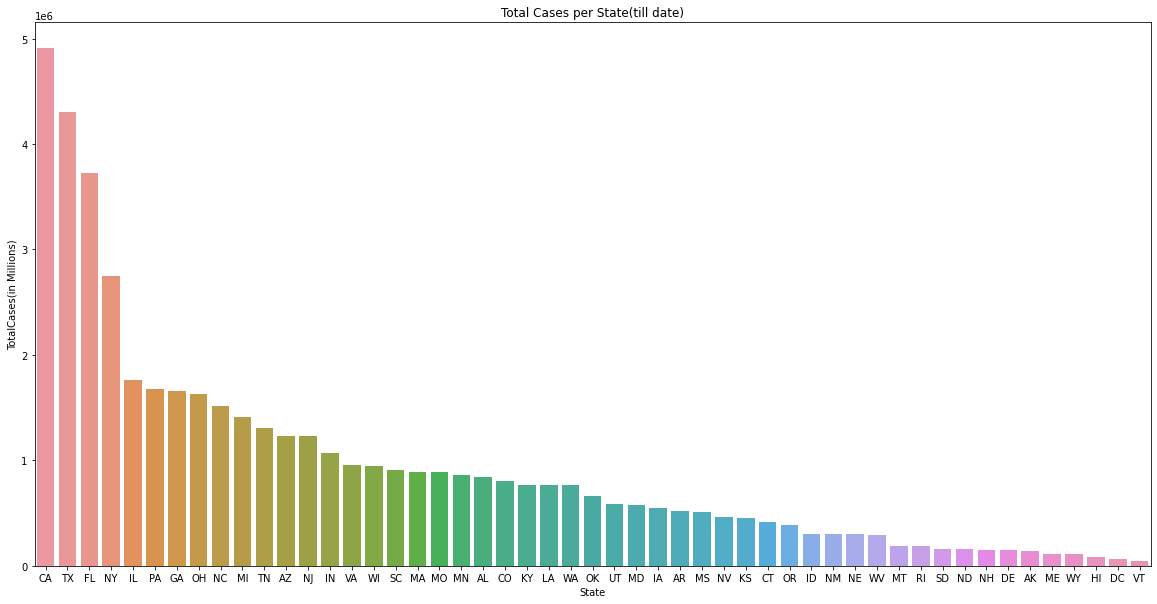

In [99]:
#Bar plot of Total Covid Cases per State
plt.rcParams['figure.figsize'] = [20, 10]

x=CsvWebAPI['StateName']
y=CsvWebAPI['TotalCases']
x_pos = np.arange(len(x))
plt.title('Total Cases per State(till date)')
plt.xticks(x_pos, x)
barplotprob=sns.barplot(x=x,y=y)
barplotprob.set(xlabel="State", ylabel = "TotalCases(in Millions)")

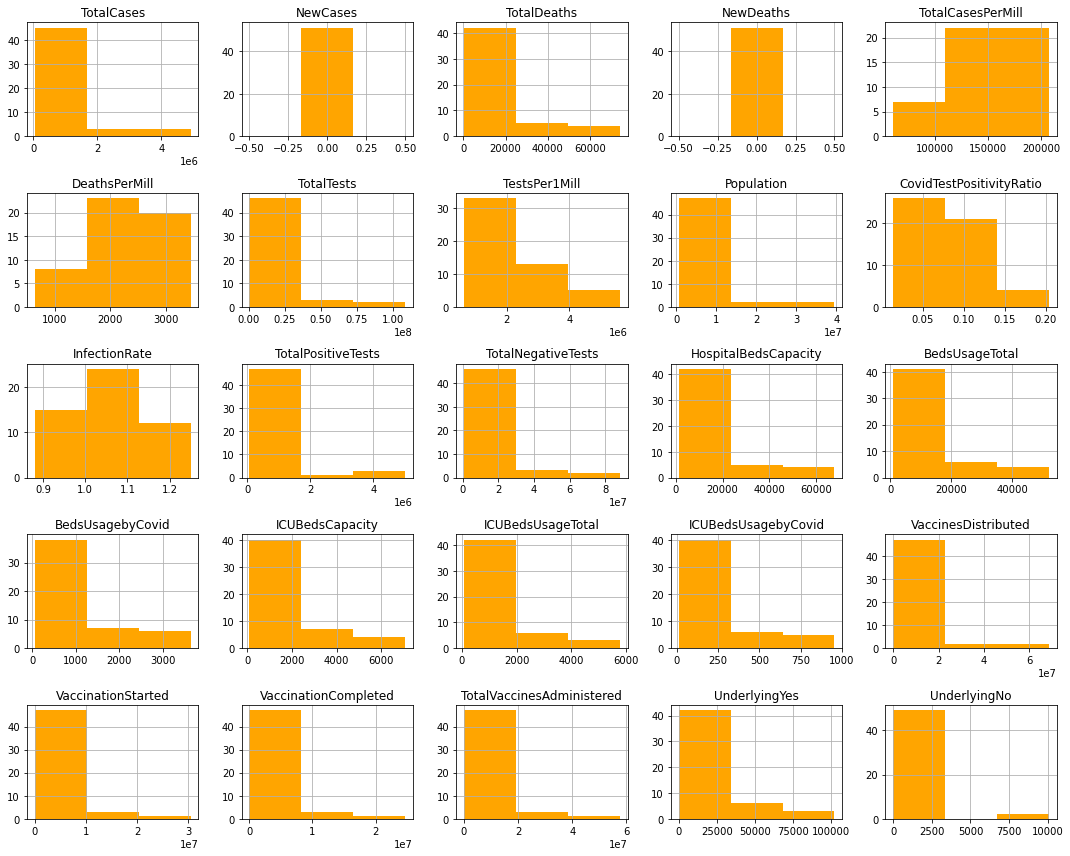

In [78]:
#Histogram plots of all the variables in the data set
CsvWebAPI.hist(bins=3,figsize=(15,12), color='orange')
plt.tight_layout()

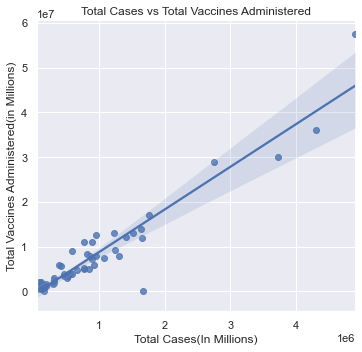

In [128]:
#Scatterplot of total cases vs Total vaccine admistered correlation
sns.set(rc = {'figure.figsize':(20,20)})
warnings.simplefilter(action="ignore", category=FutureWarning)#ignoring warnings
scatterplot=sns.lmplot('TotalCases',"TotalVaccinesAdministered", CsvWebAPI);
scatterplot.set(xlabel="Total Cases(In Millions)", ylabel = "Total Vaccines Administered(in Millions)",title="Total Cases vs Total Vaccines Administered")

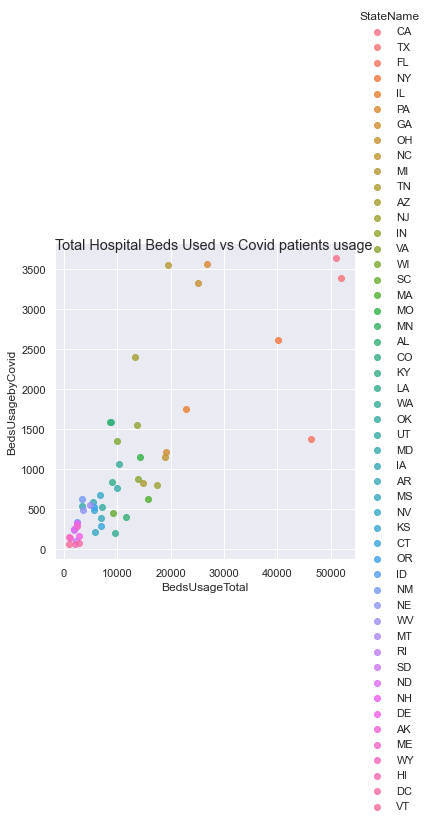

In [125]:
#Scatterplot of Covid patients hospital beds usage in comparision to total beds
sns.set(rc={'figure.figsize':(20,20)})
BedUsage=sns.lmplot('BedsUsageTotal',"BedsUsagebyCovid", CsvWebAPI, hue="StateName");
BedUsage.fig.suptitle('Total Hospital Beds Used vs Covid patients usage');

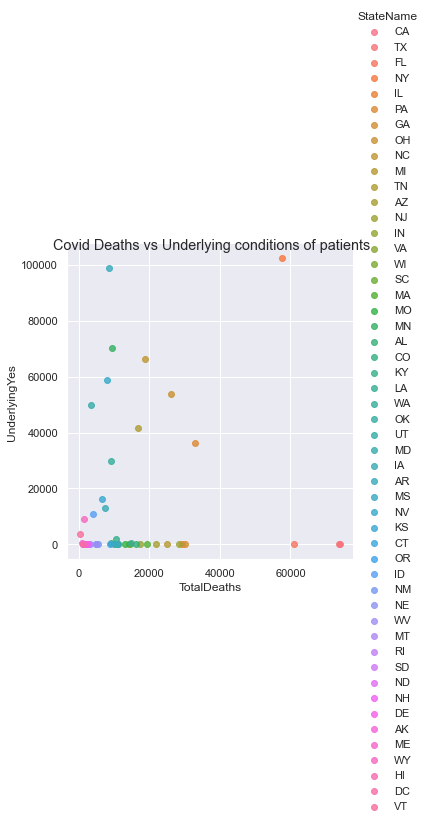

In [124]:
#Scatter plot of total deaths per state factored against if the patients have underlying conditions
sns.set(rc={'figure.figsize':(50,50)})
conditions=sns.lmplot('TotalDeaths',"UnderlyingYes", CsvWebAPI, hue="StateName")
conditions.fig.suptitle('Covid Deaths vs Underlying conditions of patients');

**What I learned?**
DSC540 Term project milestone journey has been interesting. I had experience in dealing with DBs,CSV files, but for completing this course I had to learn how to scrape data off of web pages and API responses.
This learning is going to be useful to be able to work with some of the coming up projects at my workplace -especially working with APIs.
Also I must say that the weekly assignments and corresponding material is well structured and builds on top of preceeding assignment to help bring things together to enable working with these different data sources.

**Implication of cleansing up data**
It has been intersting to work with three varied data sources. 
My first and biggest CDC source has been extensive with 32M records. But due to the way the data is captured at different city/county and state authority levels and rolled up, there has been a lot missing/unknown information. Which forced me to cleanse most of the data and brought it down to 600K. This led to a lot of outlier situation with calculating underlying conditions implications on serious outcomes of Covid infection including hospitalization to death. 
This sitation is clearly outlined in the above last plot that shows a lot of 0 values for quite a few states to draw any meaningful conclusion. If the current data is used as is, it would have serious negative implications in any health care decisions made and that would be wrong and unethical.

    One of the things I will consider in my future iterations of this is to Impute the missing data vs ignoring the missing rows completely. 
    